In [1]:
from pathlib import Path
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
repo_dir = Path(Path.cwd()).parent
%matplotlib inline


### _Read data_

In [2]:
data = pd.read_csv(repo_dir / 'data/census.csv')


_Strip spaces before each column name_

In [3]:
# data.rename(columns={k:k.strip() for k in data.columns},inplace=True)
# data.to_csv(repo_dir / 'data/census.csv', index=False)

In [4]:
data.columns

Index(['age', 'workclass', 'fnlgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [10]:
pd.set_option("display.max_colwidth",None)
data.salary.unique()
data[data['salary'] == ' >50K']

,age,workclass,fnlgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32545,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [5]:
profile = ProfileReport(data , title='Cencus Pandas Profile', explorative=True)

In [5]:
profile.to_file(output_file=repo_dir / "eda/Cencus Profile.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
data.describe()

,age,fnlgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [14]:
data.skew()

age                0.558743
fnlgt              1.446980
education-num     -0.311676
capital-gain      11.953848
capital-loss       4.594629
hours-per-week     0.227643
dtype: float64

# Observations
- `age` column in range of 17 to 90 
- `fnight` in range of 12285 and the max value is 1484705
- `education-num` has range of 1 to 16
- `capital-gain` starts from 0 end at 99999
- `capital-loss` starts at 0 end at 4356
- `hours-per-week` range between 1 to 99
---
## Outliers
- There's huge gap in `capital-gain` since `75%` of the values are 0 and max value is 99999
- Same gap for the `fnigt` column 
- `capital_gain` has mjority of zeros with percentage 95.3%
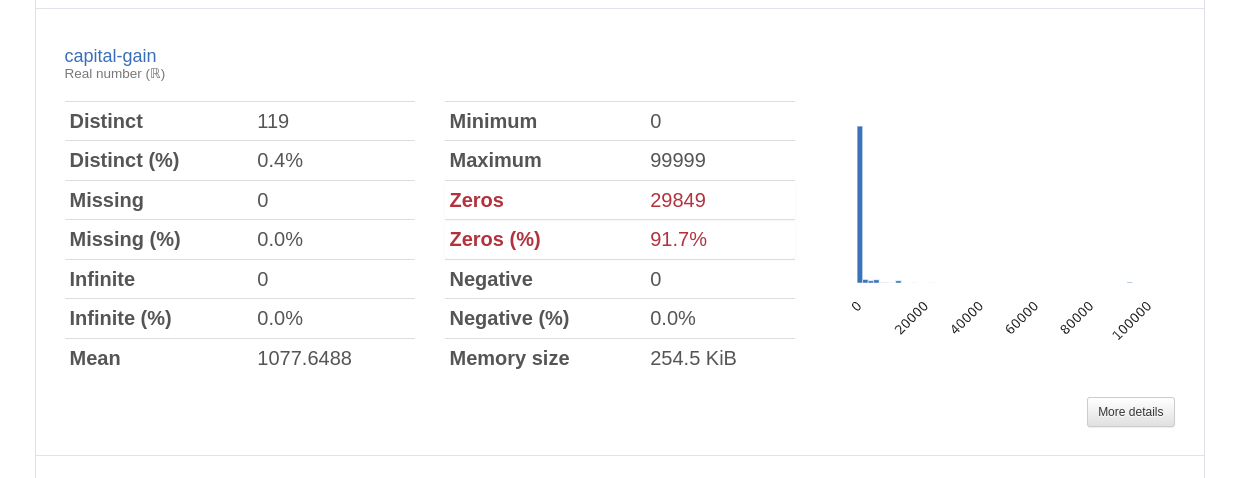
- `education-num` is very correlated with education so it can be dropped
- As pandas profile show us some `?` values in `workclass`, `native-country` so we can do one of two options, drop theses row or replace it with most common value, But I'm not subject matter expert so simply I will drop these columns in the cleaning stage
---
## To be dropped
- rows with `?`
- `fnglt` 
- `education-num`
- `capital-gain`
- `capital-loss`


False

In [5]:
## Identify the target columns
data['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

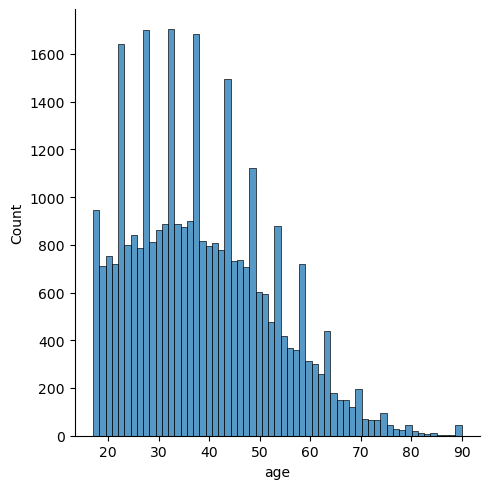

In [6]:
## Age distribution
sns.displot(data['age'])

<Figure size 1200x800 with 0 Axes>

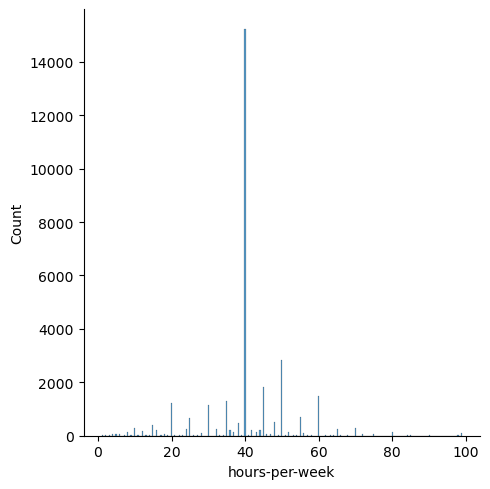

In [10]:
plt.figure(figsize=(12,8))
sns.displot(data['hours-per-week'])

## Age column
- ### _the majoirty of ages falling in range 20-50_
- ### _Also no null values_



<AxesSubplot:>

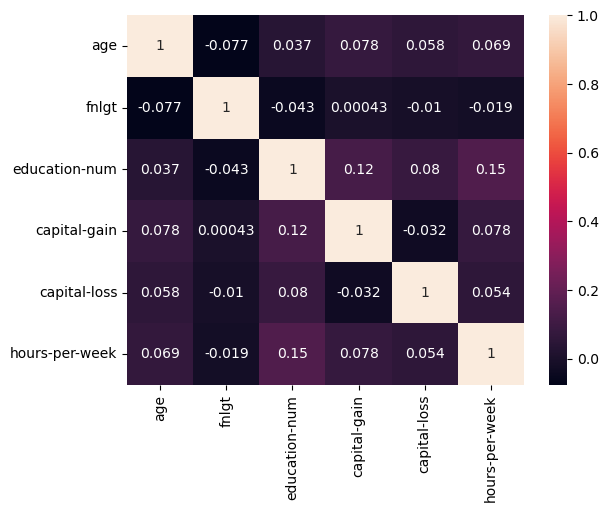

In [13]:
import seaborn as sns
sns.heatmap(data.corr(), annot= True)